In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Iris Dataset**

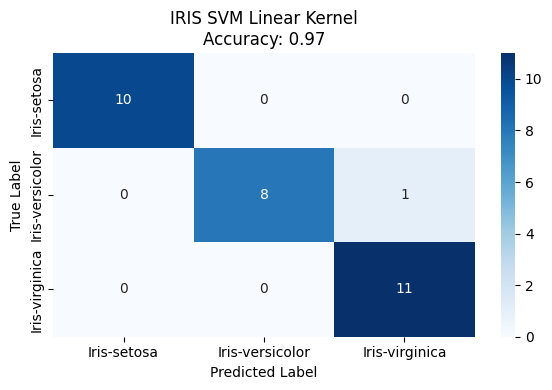

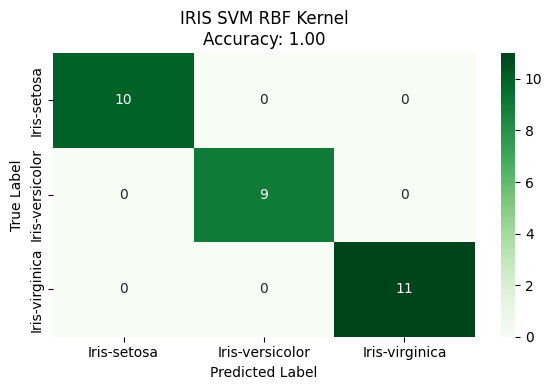

In [7]:
iris = pd.read_csv("iris.csv")

label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])
class_names_iris = label_encoder.classes_

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_iris = scaler.fit_transform(X_train_iris)
X_test_iris = scaler.transform(X_test_iris)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = svm_linear.predict(X_test_iris)
acc_linear = accuracy_score(y_test_iris, y_pred_linear)
cm_linear = confusion_matrix(y_test_iris, y_pred_linear)

plt.figure(figsize=(6,4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_iris, yticklabels=class_names_iris)
plt.title(f'IRIS SVM Linear Kernel\nAccuracy: {acc_linear:.2f}')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)
acc_rbf = accuracy_score(y_test_iris, y_pred_rbf)
cm_rbf = confusion_matrix(y_test_iris, y_pred_rbf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', xticklabels=class_names_iris, yticklabels=class_names_iris)
plt.title(f'IRIS SVM RBF Kernel\nAccuracy: {acc_rbf:.2f}')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# **2. Letter Recognition Dataset**

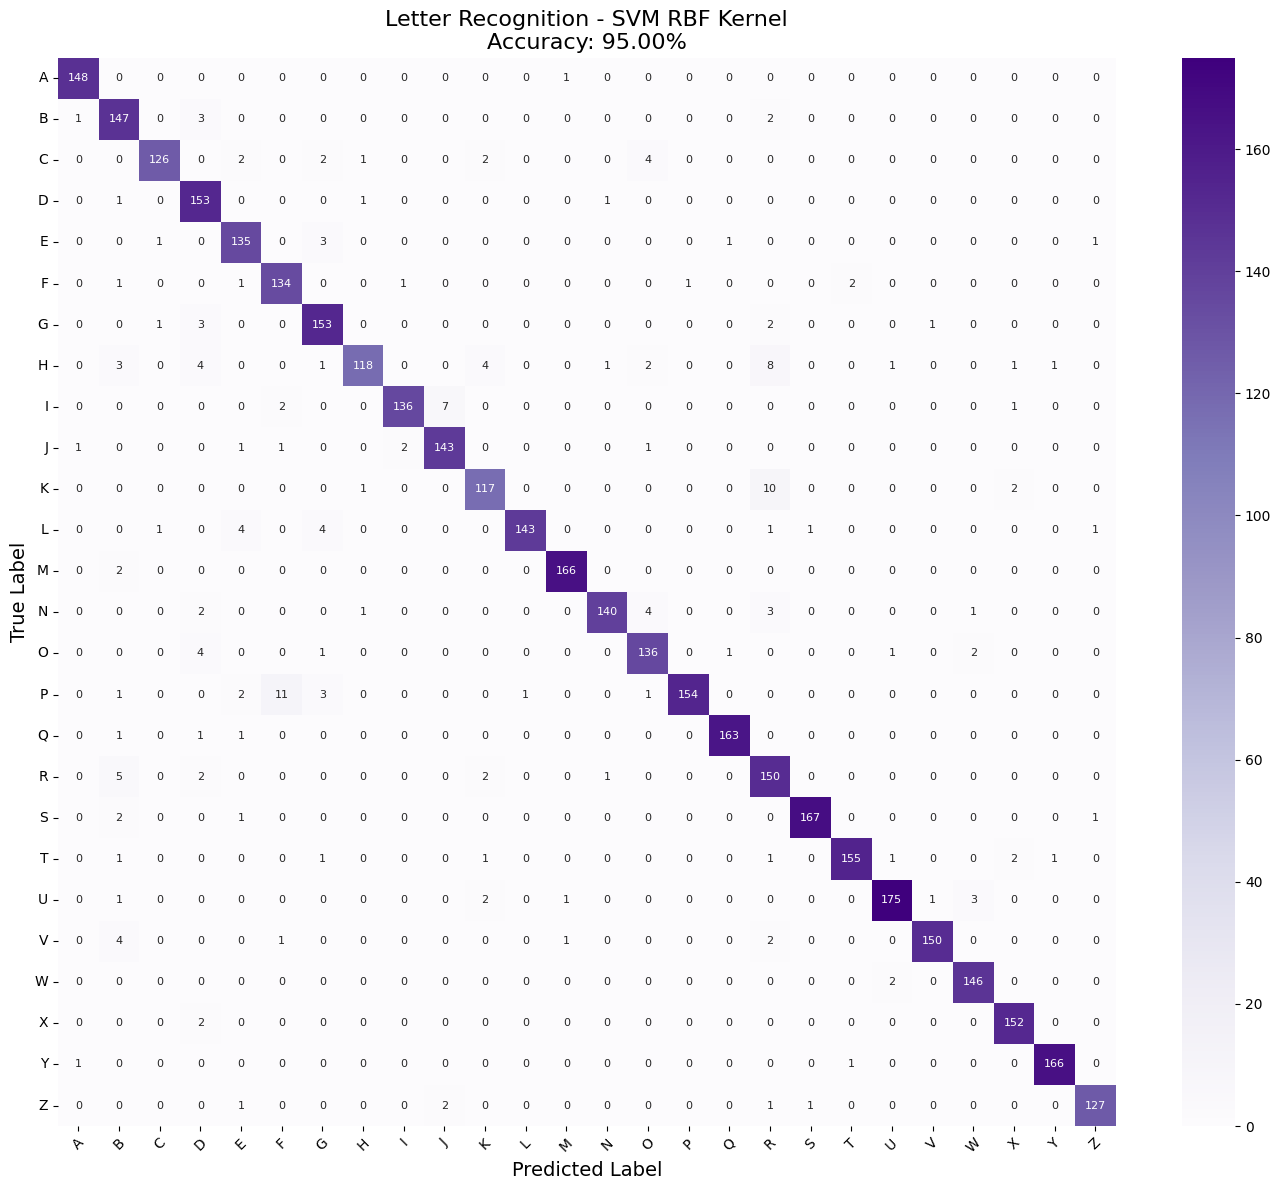

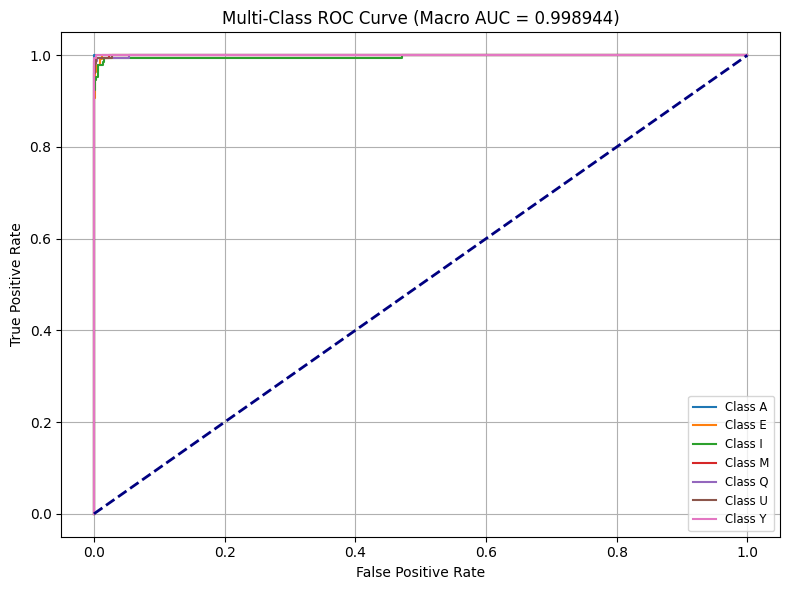

Exact AUC Score = 0.9989439653163925


In [14]:
letters = pd.read_csv("letter-recognition.csv")

X_letters = letters.drop('letter', axis=1)
y_letters = letters['letter']

label_encoder_letters = LabelEncoder()
y_letters_encoded = label_encoder_letters.fit_transform(y_letters)
class_names_letters = label_encoder_letters.classes_

X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(
    X_letters, y_letters_encoded, test_size=0.2, random_state=42)

scaler_letters = StandardScaler()
X_train_letters = scaler_letters.fit_transform(X_train_letters)
X_test_letters = scaler_letters.transform(X_test_letters)

svm_letters = SVC(kernel='rbf', probability=True)
svm_letters.fit(X_train_letters, y_train_letters)

y_pred_letters = svm_letters.predict(X_test_letters)

acc_letters = accuracy_score(y_test_letters, y_pred_letters)

cm_letters = confusion_matrix(y_test_letters, y_pred_letters)

plt.figure(figsize=(14, 12))
sns.heatmap(cm_letters, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_letters,
            yticklabels=class_names_letters,
            annot_kws={"size": 8},
            cbar=True)
plt.title(f'Letter Recognition - SVM RBF Kernel\nAccuracy: {acc_letters*100:.2f}%', fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

y_test_binarized = label_binarize(y_test_letters, classes=np.arange(len(class_names_letters)))
y_score = svm_letters.predict_proba(X_test_letters)

auc_score = roc_auc_score(y_test_binarized, y_score, average='macro')

fpr = dict()
tpr = dict()
for i in range(len(class_names_letters)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])

plt.figure(figsize=(8, 6))
for i in range(0, len(class_names_letters), 4):  # Plot every 4th class
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {class_names_letters[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Multi-Class ROC Curve (Macro AUC = {auc_score:.6f})")
plt.legend(loc="lower right", fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()

print(f"Exact AUC Score = {auc_score}")